# Retrieve gender based on name

Use gender-api.com
(Limit 500 records per month)

In [6]:
import pandas as pd
import json
from urllib.request import urlopen

In [9]:
df = pd.read_csv('data\wallethub.csv')
df.drop(columns=['Unnamed: 0', 'boaDate', 'boaText'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     2440 non-null   object
 1   date     2440 non-null   object
 2   stars    2440 non-null   int64 
 3   text     2440 non-null   object
 4   product  2411 non-null   object
 5   source   2440 non-null   object
dtypes: int64(1), object(5)
memory usage: 114.5+ KB


In [10]:
df['gender'] = None

In [7]:
myKey = "zyGklwvVpAasmldseS"
for ind, row in df.iterrows():
    name = row[0]
    if name.split(' '):
        name = name.split(' ')[0]
    url = "https://gender-api.com/get?key=" + myKey + "&name=" + name
    response = urlopen(url)
    decoded = response.read().decode('utf-8')
    data = json.loads(decoded)
    print( "Gender: " + data["gender"]); #Gender: male
    df.at[ind, 'gender'] = data['gender']

Gender: male
Gender: male
Gender: female
Gender: unknown
Gender: female
Gender: female
Gender: male
Gender: male
Gender: unknown
Gender: male
Gender: male
Gender: male
Gender: female
Gender: female
Gender: female
Gender: male
Gender: female
Gender: female
Gender: male
Gender: female
Gender: male
Gender: female
Gender: female
Gender: female
Gender: male
Gender: male
Gender: female
Gender: female
Gender: male
Gender: male
Gender: female
Gender: male
Gender: unknown
Gender: male
Gender: male
Gender: unknown
Gender: female
Gender: female
Gender: male
Gender: male
Gender: unknown
Gender: male
Gender: female
Gender: male
Gender: male
Gender: female
Gender: unknown
Gender: male
Gender: female
Gender: male
Gender: unknown
Gender: male
Gender: male
Gender: female
Gender: male
Gender: male
Gender: male
Gender: male
Gender: male
Gender: male
Gender: unknown
Gender: male
Gender: male
Gender: male
Gender: male
Gender: male
Gender: female
Gender: female
Gender: male
Gender: male
Gender: male
Gender:

Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown
Gender: unknown


KeyboardInterrupt: 

In [24]:

df.loc[df.gender == "unknown", "gender"] = None

In [28]:
df.to_csv('data\wallethub_genders.csv')

In [30]:
df.head()

,name,date,stars,text,product,source,gender
0,Jason Dome,2020-12-08,1,Don't do it!! They will randomly close your ac...,Bank of America Checking,wallethub.com,male
1,Pov,2020-12-07,5,I opened this account online I don’t need to g...,Bank of America Credit Cards,wallethub.com,male
2,amanda,2020-12-07,5,"Good card, always pay my balance when due and ...",Bank of America Credit Cards,wallethub.com,female
3,clotildevil,2020-12-07,1,"Honestly, if you're looking for a bank to stan...",Bank of America Credit Cards,wallethub.com,None
4,Karen Holly,2020-12-07,1,Customer service experience is time consuming ...,Bank of America Checking,wallethub.com,female


In [42]:
import datetime

df['incident_month'] = df['date'].str[5:7].astype(int)
df['incident_day'] = df['date'].str[8:].astype(int)
df['geod'] = range(1, len(df) + 1)
df['count'] = 1
df.rename(columns={'stars': 'rating'}, inplace = True)
df.head()

,name,date,rating,text,product,source,gender,incident_month,incident_day,geod,count
0,Jason Dome,2020-12-08,1,Don't do it!! They will randomly close your ac...,Bank of America Checking,wallethub.com,male,12,8,1,1
1,Pov,2020-12-07,5,I opened this account online I don’t need to g...,Bank of America Credit Cards,wallethub.com,male,12,7,2,1
2,amanda,2020-12-07,5,"Good card, always pay my balance when due and ...",Bank of America Credit Cards,wallethub.com,female,12,7,3,1
3,clotildevil,2020-12-07,1,"Honestly, if you're looking for a bank to stan...",Bank of America Credit Cards,wallethub.com,None,12,7,4,1
4,Karen Holly,2020-12-07,1,Customer service experience is time consuming ...,Bank of America Checking,wallethub.com,female,12,7,5,1


In [44]:
df['weekday'] = ''
for ind, row in df.iterrows():
    date = pd.Timestamp(row[1])
    df.at[ind, 'weekday'] = date.dayofweek
    

In [50]:
df.to_csv('data\wallethub_processed.csv')

In [59]:
df = pd.read_csv('data\wallethub_processed.csv')

In [63]:
df.columns

Index(['Unnamed: 0', 'name', 'date', 'rating', 'text', 'product', 'source',
       'gender', 'incident_month', 'incident_day', 'geod', 'count', 'weekday'],
      dtype='object')

In [64]:
df.drop(columns=['Unnamed: 0', 'incident_month', 'incident_day', 'geod', 'count'], inplace=True)

In [65]:
df['date'] = pd.to_datetime(df['date'])

# Predict Products



In [2]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import re

mypath = 'data'
files = [mypath+'\\'+ f for f in listdir(mypath) if isfile(join(mypath, f))]


dfs=[]
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)
df = pd.concat(dfs)
df.iloc[0].text

"don't you set up an account with Bank of America they make it almost impossible to close that account. tell you to call him to close your accounts however you sit on hold for an hour or two and then when you do finally reach customer service person they make some notes on your account and nothing happens from there. they will absolutely not give you a email contact even if you are a online banking customer only meaning you've never even stepped foot in a branch or called. that's why I think they call it online banking. they send you in circles and chasing your tail trying to close your account, I called in sat on hold for hours talked To a customer service rep who was putting notes on my account to close it and stated that it would be taken care of. a week later I get a letter in the mail stating my account has a negative balance and I have to pay off this monthly fees from them that went negative. that's because I was assuming and shame on me but that my account has been closed her t

In [3]:
df = pd.read_csv('data\wallethub.csv')
df.columns

Index(['Unnamed: 0', 'name', 'date', 'stars', 'text', 'boaDate', 'boaText',
       'product', 'source'],
      dtype='object')

In [4]:
#df = df[['text', 'product']]
df = df[pd.notnull(df['product'])]
df = df[df['product'] !='Bank of America Investments'] 

In [4]:
from io import StringIO

In [5]:
df['category_id'] = df['product'].factorize()[0]
category_id_df = df[['product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'product']].values)

We see that the number of complaints per product is imbalanced. Consumers’ complaints are more biased towards Credit Cards and Checking accounts. Usually we would try to fix it. But in our case it is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes.

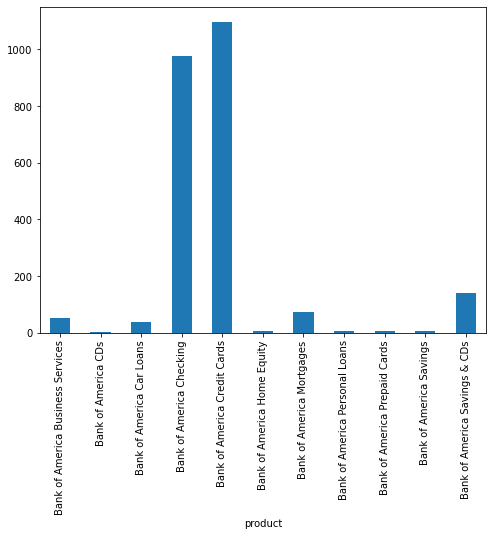

In [119]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('product').text.count().plot.bar(ylim=0)
plt.show()

For each term in our dataset, we will calculate Term Frequency and Inverse Document Frequency (tf-idf).

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.text).toarray()
labels = df.category_id
features.shape

(2410, 80396)

In [81]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank of America Business Services':
  . Most correlated unigrams:
. notary
. ppp
  . Most correlated bigrams:
. phone solution
. solution don
# 'Bank of America CDs':
  . Most correlated unigrams:
. rudy
. teddy
  . Most correlated bigrams:
. coral gables
. stars helped
# 'Bank of America Car Loans':
  . Most correlated unigrams:
. car
. loan
  . Most correlated bigrams:
. great car
. car loan
# 'Bank of America Checking':
  . Most correlated unigrams:
. card
. checking
  . Most correlated bigrams:
. credit card
. checking account
# 'Bank of America Credit Cards':
  . Most correlated unigrams:
. rewards
. card
  . Most correlated bigrams:
. checking account
. credit card
# 'Bank of America Home Equity':
  . Most correlated unigrams:
. virtuous
. heloc
  . Most correlated bigrams:
. wise use
. personally business
# 'Bank of America Mortgages':
  . Most correlated unigrams:
. refinanced
. mortgage
  . Most correlated bigrams:
. unapplied funds
. pay mortgage
# 'Bank of America Persona

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


C:\Users\mskac\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\mskac\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\mskac\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\mskac\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


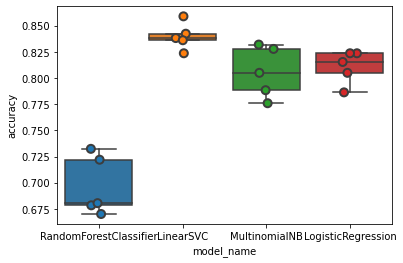

In [83]:


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []


for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [84]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.839834
LogisticRegression        0.810788
MultinomialNB             0.805809
RandomForestClassifier    0.696680
Name: accuracy, dtype: float64

LinearSVC performs better than the other  classifiers.

In [122]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [123]:
from IPython.display import display
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)

print(conf_mat)

[[281   8   0   0   0   0   0   0   0   0   0]
 [ 28 303   0   1   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0]
 [  3   5   0   0   0   0   0   0   0   0   0]
 [ 29   1   0   0  16   0   0   0   0   0   0]
 [ 13   1   0   0   0   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0   0   0   0   0]
 [ 11  13   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0]
 [  0   4   0   0   0   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0   0   0   0   0]]


In [87]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['product'].unique()))

                                   precision    recall  f1-score   support

         Bank of America Checking       0.76      0.97      0.85       289
     Bank of America Credit Cards       0.90      0.91      0.91       332
    Bank of America Prepaid Cards       0.00      0.00      0.00         1
        Bank of America Car Loans       0.00      0.00      0.00         8
    Bank of America Savings & CDs       1.00      0.35      0.52        46
Bank of America Business Services       0.00      0.00      0.00        14
              Bank of America CDs       0.00      0.00      0.00         2
        Bank of America Mortgages       0.00      0.00      0.00        24
          Bank of America Savings       0.00      0.00      0.00         1
      Bank of America Home Equity       0.00      0.00      0.00         4
   Bank of America Personal Loans       0.00      0.00      0.00         2

                         accuracy                           0.83       723
                       

C:\Users\mskac\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Result - not enough data

In [6]:
import pickle

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
pickle.dump(count_vect, open("vectorizer.pickle", "wb")) 

In [7]:
model = LinearSVC().fit(X_train_tfidf, y_train)

In [12]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 

In [7]:
import pickle
filename = 'finalized_model.sav'

# load the model from disk
model = pickle.load(open(filename, 'rb'))

In [9]:

print(model.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Bank of America Credit Cards']


In [9]:

vectorizer = pickle.load(open("vectorizer.pickle", 'rb'))     
vectorizer.transform(['adgfhaksjdawersgzfaesdf']).shape

(1, 7061)

In [11]:
print(model.predict(vectorizer.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Bank of America Credit Cards']


# Complete products for the rest of the data

In [12]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import re

mypath = 'data'
files = [mypath+'\\'+ f for f in listdir(mypath) if isfile(join(mypath, f))]


dfs=[]
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)
df = pd.concat(dfs)


In [13]:
df['product'] = ''

In [15]:
for ind, row in df.iterrows():
    # list of text documents
    text = row['text']
    df['product'] = model.predict(vectorizer.transform([text]))[0]

In [22]:
df['responded'] = False
df['responded'].loc[df['boaDate'].notna()] = True
columns = ['name', 'date', 'stars', 'text', 'product', 'source', 'gender', 'weekday', 'responded', 'boaDate']
df = df[columns]
df.head(15)

C:\Users\mskac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mskac\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\mskac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,name,date,stars,text,product,source,gender,weekday,responded,boaDate
0,scott o,11/21/2020,1.0,don't you set up an account with Bank of Ameri...,Bank of America Checking,bbb.org,NaN,NaN,True,11/27/2020
1,Samy A,11/17/2020,1.0,Worst bank ever. I been a customer with Bank o...,Bank of America Checking,bbb.org,NaN,NaN,False,NaN
2,Sharmell B,11/15/2020,1.0,Bank of America in McDonough ga 30253\n\nHas s...,Bank of America Checking,bbb.org,NaN,NaN,False,NaN
3,Pam M,11/12/2020,1.0,They have absolutely HORRIBE CUSTOMER SERVICE!...,Bank of America Checking,bbb.org,NaN,NaN,False,NaN
4,Gulshan G,11/04/2020,1.0,Have a checking account with direct deposit fo...,Bank of America Checking,bbb.org,NaN,NaN,False,NaN
5,Kathryn G,11/02/2020,1.0,Worst bank ever. They do not follow through on...,Bank of America Checking,bbb.org,NaN,NaN,False,NaN
6,CATHERINE H,10/27/2020,1.0,"Terrible customer service, dishonest and looki...",Bank of America Checking,bbb.org,NaN,NaN,True,10/30/2020
7,Ashur K,10/15/2020,1.0,"On June 8th, 2020 there were two unauthorized ...",Bank of America Checking,bbb.org,NaN,NaN,False,NaN
8,Abhijeeth,10/15/2020,1.0,I have had one of the worst customer service e...,Bank of America Checking,bbb.org,NaN,NaN,False,NaN
9,Shannon L,10/15/2020,1.0,I have been trying for 3 months now to resolve...,Bank of America Checking,bbb.org,NaN,NaN,False,NaN


# Gender from name